# Analiza rozkładów prawdopobieństwa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Zadanie - rozkład dyskretny
Zmienna losowa $X$ ma funkcje prawdopodobieństwa nastepującej postaci:

| $x_i$ | -3  | -1  | 3   | 5   |
|-------|-----|-----|-----|-----|
| $p_i$ | 0.1 | 0.2 | 0.5 | 0.2 |

a) Narysuj wykres rozkładu prawdopodobieństwa.

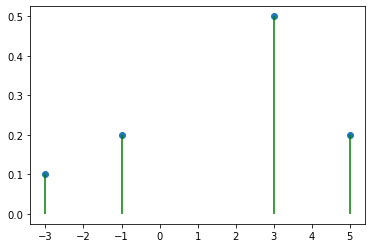

In [2]:
X = [-3, -1, 3, 5]
p = [0.1, 0.2, 0.5, 0.2]

plt.scatter(x=X, y=p)
plt.vlines(X, 0, p, colors='g')

*b) Narysuj dystrybuantę $F$ tego rozkładu.

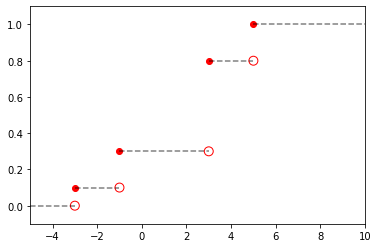

In [3]:
F = np.cumsum(p)

x_lim = [-5] + X + [10]
f = [0] + list(F)

plt.scatter(X, F, label='cdf', color='r')
plt.scatter(X, f[:-1], s=80, facecolors='none', edgecolors='r')
plt.xlim([-5, 10])
plt.ylim([-0.1, 1.1])

for i in range(len(x_lim) - 1):
   plt.hlines(xmin = x_lim[i], xmax = x_lim[i+1], y=f[i], color='black', alpha=0.5, linestyle='--')

plt.show()

c) Oblicz prawdopodobieństwa $P(X > 1)$ i $P( \frac{1}{4} < X < 5)$.

obie wartości można odczytać z tabeli rozkładu: \
$P(X>1) = 1 - P(X \le 1) = 1 - F(1) = 1 - 0.3 = 0.7$ \
$P(1/4<X<5) = F(5) - F(1/4) = 0.5$

d) Oblicz wartość oczekiwaną, wariancję i odchylenie standardowe zmiennej X.

In [4]:
X = np.array(X)
p = np.array(p)

ex = np.dot(X, p)  # ex = 0.1*-3+0.2*-1+0.5*3+0.2*5
print("Wartość oczekiwana: {}".format(ex))

ex2 = np.dot(X**2, p)
print("Drugi moment: {}".format(ex2))

var = ex2 - ex**2
print("Wariancja: {}".format(var))

std = np.sqrt(var)
print("Odchylenie standardowe: {}".format(std))

Wartość oczekiwana: 2.0
Drugi moment: 10.6
Wariancja: 6.6
Odchylenie standardowe: 2.569046515733026


## ***Zadanie - rozkład ciągły
Zmienna losowa X ma rozkład ciągły o gęstości:

$$
    f(x)=\left.
    \begin{cases}
    x \quad &\text{dla}\quad 0<x\leq 1\\
    2-x \quad &\text{dla}\quad 1<x\leq 2\\
    0 \quad &\text{dla}\quad x>2, x\le 0.
    \end{cases}\right.
$$

a) Narysuj wykres gęstości.

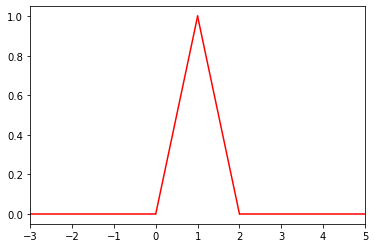

In [5]:
xa = np.linspace(0, 1, 100)
ya = xa

xb = np.linspace(1, 2, 100)
yb = 2 - xb

plt.xlim([-3, 5])
plt.plot(xa, ya, color='r')
plt.plot(xb, yb, color='r')
plt.hlines(xmin=-3, xmax=0, y=0, color='r')
plt.hlines(xmin=2, xmax=5, y=0, color='r')

b) Wyznacz i narysuj dystrybuante $F$ tego rozkładu.

$$
    F(x)=\left.
    \begin{cases}
    0 \quad &\text{dla}\quad x\leq 0\\
    \frac{x^2}{2} \quad &\text{dla}\quad 0<x\leq 1\\
    -\frac{x^2}{2}+2x-1 \quad &\text{dla}\quad 1<x\leq 2\\
    1 \quad &\text{dla}\quad x>2.
    \end{cases}\right.
$$

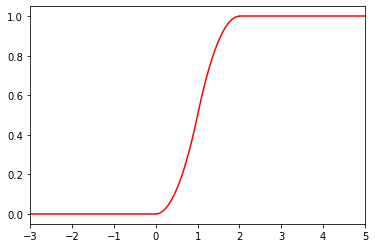

In [6]:
xa = np.linspace(0, 1, 100)
ya = xa ** 2 / 2

xb = np.linspace(1, 2, 100)
yb = - xb**2 / 2 + 2 * xb - 1

plt.xlim([-3, 5])
plt.plot(xa, ya, color='r')
plt.plot(xb, yb, color='r')
plt.hlines(xmin=-3, xmax=0, y=0, color='r')
plt.hlines(xmin=2, xmax=5, y=1, color='r')

c) Oblicz prawdopodobieństwa $P(X > 1)$ i $P( \frac{1}{4} < X \leq 1)$.

z własności symetrii dystrybuanty (oraz jej unormowania): \
$P(X > 1) = 1 - F(1) = 1/2$ \
$P( \frac{1}{4} < X \leq 1) = P(X\leq 1)-P(X\leq \frac{1}{4}) = F(1)-F(\frac{1}{4})=1/2-1/32 = 15/32$

d) Oblicz wartość oczekiwaną, wariancję i odchylenie standardowe zmiennej X.

In [39]:
xa = np.linspace(0, 1, 100)
pa = xa

xb = np.linspace(1, 2, 100)
pb = 2 - xb

X = np.concatenate([xa, xb])
p = np.concatenate([pa, pb])

ex = np.dot(X, p) * (max(X) - min(X)) / len(X)
print("Wartość oczekiwana: {}".format(ex))

var = np.dot(X**2, p) * (max(X) - min(X)) / len(X) - ex**2
print("Wariancja: {}".format(var))

std = np.sqrt(var)
print("Odchylenie standardowe: {}".format(std))

Wartość oczekiwana: 1.0000000000000002
Wariancja: 0.16498316498316434
Odchylenie standardowe: 0.4061811972299608
